<a href="https://colab.research.google.com/github/milkywayweaver/learn_pytorch/blob/main/projects/PyT_P001_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEURAL NETWORK LINEAR REGERSSION USING PYTORCH** <br>
<br>
📖 Link to the course I follow: <br>
* PyTorch for Deep Learning & Machine Learning - freeCodeCamp.org, taught by Daniel Bourke. <br>
https://youtu.be/V_xro1bcAuA?si=luBE0ln8qKDfQWyM

In [38]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

✅ Plotting functions

In [39]:
def plot_predictions(X_train,X_test,y_train,y_test,y_pred=None):
  X_train = X_train.cpu()
  X_test = X_test.cpu()
  y_train = y_train.cpu()
  y_test = y_test.cpu()

  y_real = weight*X_test+bias

  plt.figure(figsize=(4,3))
  plt.plot(X,weight*X+bias,color='lightgrey',linewidth=1,zorder=0)
  plt.scatter(X_train,y_train,color='silver',label='Train',s=6)
  plt.scatter(X_test,y_test,color='C0',label='Test',s=6)
  if y_pred != None:
    # plt.scatter(X_test,y_real,color='greenyellow',s=20,label='Acutal Value',zorder=0)
    plt.scatter(X_test,y_pred,color='C2',label='Prediction',s=8)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Data',fontsize=12)
  plt.legend(loc='best',fontsize=6)
  plt.show()

def loss_curve():
  plt.figure(figsize=(4,3))
  plt.axhline(0,linewidth=1,color='lightgrey',zorder=0,alpha=1)
  plt.axhline(0.5,linewidth=1,color='lightgrey',zorder=0,alpha=0.6)
  plt.axhline(1,linewidth=1,color='lightgrey',zorder=0,alpha=0.3)
  plt.plot(epoch_counts,losses,label='Loss',color='C0')
  plt.plot(epoch_counts,test_losses,label='Test Loss',color='C1')
  plt.plot(epoch_counts,real_losses,label='Real Loss',color='C2')
  plt.title('Loss Curve',fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='best',fontsize=8)
  plt.show()

✅ Creating the data

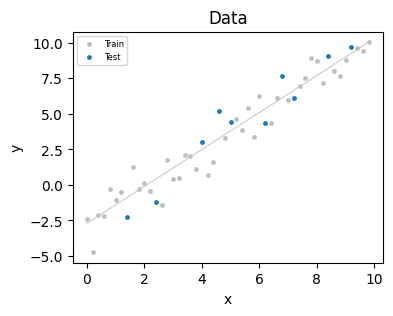

In [40]:
weight = 1.3
bias = -2.7

X = torch.arange(0,10,0.2).unsqueeze(1)
y_noise = torch.tensor(np.random.normal(0,1.0,size=X.shape[0])).unsqueeze(1)
y = weight * X + bias + y_noise

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

plot_predictions(X_train,X_test,y_train,y_test)

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device in use: {device}')

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

Device in use: cuda


✅ Prepare the model

In [42]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1,device=device)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

✅ Make train function

In [43]:
def train(model,epochs,lr):
  loss_fn = nn.L1Loss()
  optimizer = torch.optim.SGD(params=model.parameters(),lr=lr)

  epoch_counts = []
  losses = []
  test_losses = []
  real_losses = []

  for epoch in range(epochs):
    # Train
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluate
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred,y_test)
      real_loss= loss_fn(test_pred,X_test*weight+bias)

    # Print
    if epoch % 50 == 0:
      print(f'Epoch: {epoch} \t| Loss: {loss} \t| T_Loss: {test_loss} \t| R_Loss: {real_loss}')
    epoch_counts.append(epoch)
    losses.append(loss.detach().item())
    test_losses.append(test_loss.detach().item())
    real_losses.append(real_loss.detach().item())

  return epoch_counts,losses,test_losses,real_losses

✅ Train the model

In [44]:
model_0 = LinearRegressionModel()

epoch_counts,losses,test_losses,real_losses = train(model_0,epochs=751,lr=0.01)

Epoch: 0 	| Loss: 2.2831635227230382 	| T_Loss: 1.6494055256475713 	| R_Loss: 1.6154199838638306
Epoch: 50 	| Loss: 1.7345567331962706 	| T_Loss: 1.6303192951844432 	| R_Loss: 1.0791900157928467
Epoch: 100 	| Loss: 1.654244132464421 	| T_Loss: 1.5868194320367075 	| R_Loss: 1.0174293518066406
Epoch: 150 	| Loss: 1.5740214542799118 	| T_Loss: 1.542187509791682 	| R_Loss: 0.9640098810195923
Epoch: 200 	| Loss: 1.4950340921067302 	| T_Loss: 1.4924078681634165 	| R_Loss: 0.8942105174064636
Epoch: 250 	| Loss: 1.4159615257136944 	| T_Loss: 1.4432560661004281 	| R_Loss: 0.8263912200927734
Epoch: 300 	| Loss: 1.3393381064729064 	| T_Loss: 1.3934921839402414 	| R_Loss: 0.7680434584617615
Epoch: 350 	| Loss: 1.2741560694318812 	| T_Loss: 1.3502640524075724 	| R_Loss: 0.7124990820884705
Epoch: 400 	| Loss: 1.2152195826356096 	| T_Loss: 1.3204196113483377 	| R_Loss: 0.6570428013801575
Epoch: 450 	| Loss: 1.1574426937514395 	| T_Loss: 1.2904707270996043 	| R_Loss: 0.6027454733848572
Epoch: 500 	| L

✅ Make predictions

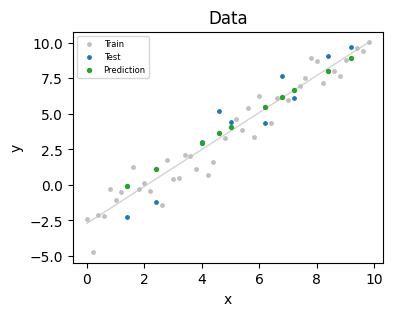

OrderedDict([('linear_layer.weight', tensor([[1.1568]], device='cuda:0')),
             ('linear_layer.bias', tensor([-1.6838], device='cuda:0'))])

In [45]:
y_pred = model_0(X_test).detach().cpu()
plot_predictions(X_train,X_test,y_train,y_test,y_pred)

model_0.state_dict()

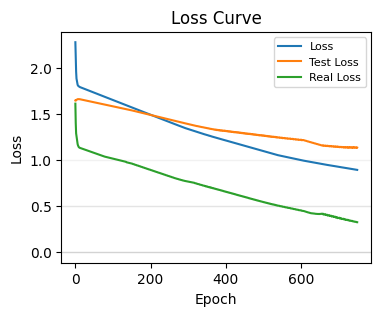

In [46]:
loss_curve()

💡 **What these losses represent** <br>
* Loss : loss between the predicted result and training data <br>
* Test Loss : loss between the predicted result and testing data *(affected by random noise)* <br>
* Real Loss : loss between the predicted result and the linear line given by weight*X+bias * (unaffected by random noise)*